# Direct Methods for the solution of Linear Systems.


In [ ]:
import numpy as np
import scipy as sp
import scipy.linalg as ln
import matplotlib.pyplot as plt
import math

In [ ]:
def plot_errors_nepero(range_n, relErr, N, x_with_N = True):
  plt.figure(figsize=(12,4))

  plt.subplot(1,2,1)
  plt.title("Relative error of approximation to Euler constant as a function of n")
  plt.plot(range_n, relErr, color="red")
  plt.ylabel("Relative error")
  plt.xlabel("Value of n")
  plt.grid()

  plt.subplot(1,2,2)
  plt.title("Comparison between true value and approximated constant")
  plt.plot(range_n, approx)
  if x_with_N:
    plt.plot(range_n, [math.e for _ in range(N)])
  else:
    plt.plot(range_n, [math.e for _ in range_n])
  plt.legend(["Approximated e", "True e"])
  plt.xlabel("Value of n")
  plt.grid()

  plt.subplots_adjust(wspace=0.5)
  plt.show()

###Exercise 1
Given a matrix $A ∈ R^{nxn}$ and the vector $x_{true} = (1, ..., 1)^T ∈ ℝ^n$ write a script that:
1. Computes the right-hand side of the linear system $b = Ax_{true}$.

2.   Computes the condition number in 2-norm of the matrix A. It is ill-conditioned? What if we use the ∞-norm instead of the 2-norm?
3.   Solves the linear system $Ax = b$ with the function `np.linalg.solve()`.
4.   Computes the relative error between the solution computed before and the true solution $x_{true}$. Remember that the relative error between $x_{true}$ and x in ℝⁿ can be computed as
$$
E(x_{true}, x) = \frac{||x − x_{true}||_2}{||x_{true}||_2}
$$

In [ ]:
n = 5

A = np.random.rand(n,n)
x_true = np.ones(n)

b = A @ x_true  # b = np.dot(A, x_true)

K_2 = np.linalg.cond(A, 2)
K_inf = np.linalg.cond(A,np.inf)

print("Condition number in 2-norm of the matrix A:")
if(K_2 < 10**n):
  print(f"A is not ill-conditioned -> K(A) = {K_2} < 10^{n}\n")
else:
  print(f"A is ill-conditioned -> K(A) = {K_2} >= 10^{n}\n")

print("Condition number in inf-norm of the matrix A:")
if(K_2 < 10**n):
  print(f"A is not ill-conditioned -> K(A) = {K_inf} < 10^{n}\n")
else:
  print(f"A is ill-conditioned -> K(A) = {K_inf} >= 10^{n}\n")

x = np.linalg.solve(A,b)

absolute_E = np.linalg.norm(x - x_true, 2)
relative_E = absolute_E / np.linalg.norm(x_true, 2)


Condition number in 2-norm of the matrix A:
A is not ill-conditioned -> K(A) = 13.753118129600704 < 10^5

Condition number in inf-norm of the matrix A:
A is not ill-conditioned -> K(A) = 18.365146965854137 < 10^5



An invertible matrix $A$ is said to be ill-conditioned when its condition number
$$K(A)=||A||\cdot||A^{-1}||$$

grows exponentially with the dimension of the problem, $n$. In this case we can see that the condition number is much smaller that the size $10^n$, hence we can derive that a random matrix is not inherently ill-conditioned.

5. Define a function that plots a graph (using matplotlib.pyplot) with the relative errors as a function of n and (in a new window) the condition number in 2-norm $K_2(A)$ and in ∞-norm, as a function of n.

In [ ]:
def plot_errors_and_K(range_x, errors, K_2s, K_infs, log = False):
  # errors plot
  plt.figure(figsize=(12,4))

  plt.subplot(1,2,1)
  plt.plot(range_x, errors, color="red")
  plt.grid()
  if log:
    plt.yscale("log")
  plt.title("Relative errors as a function of n")
  plt.xlabel("Value of n (size of the matrix)")
  plt.ylabel("Relative error")

  # condition numbers plot
  plt.subplot(1,2,2)
  plt.plot(range_x, K_2s)
  plt.plot(range_x, K_infs)
  plt.grid()
  if log:
    plt.yscale("log")
  plt.title("Condition number in 2-norm and ∞-norm as a function of n")
  plt.xlabel("Value of n (size of the matrix)")
  plt.ylabel("Condition number")
  plt.legend(["2-norm", "inf-norm"])

  plt.subplots_adjust(wspace=0.5)
  plt.show()

###Exercise 2
Test the function above with the following choices of $A∈ℝ^{n×n}$:
1. A random matrix (created with the function `np.random.rand()`) with size varying with $n = \{10, 20, 30, . . . , 100\}$.

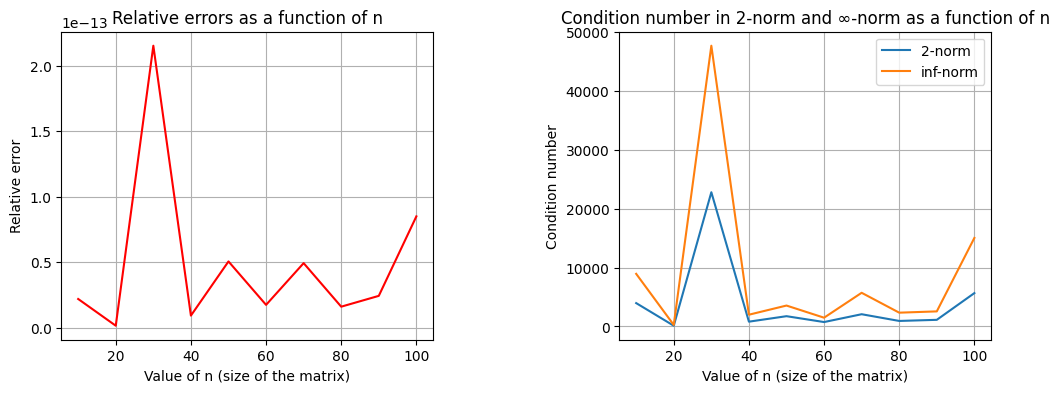

In [ ]:
errors = []
K_2s = []
K_infs = []

range_n = range(10,101,10)

for n in range_n:
  A = np.random.rand(n,n)
  x_true = np.ones(n)
  b = A @ x_true
  x = np.linalg.solve(A,b)

  absolute_E = np.linalg.norm(x - x_true, 2)
  relative_E = absolute_E / np.linalg.norm(x_true, 2)

  K_2 = np.linalg.cond(A,2)
  K_inf = np.linalg.cond(A,np.inf)

  errors.append(relative_E)
  K_2s.append(K_2)
  K_infs.append(K_inf)

plot_errors_and_K(range_n, errors, K_2s, K_infs)

The condition numbers $K_2 (A)$ and $K_∞ (A)$ for a random matrix A can exhibit similar trends because they are both measures of how much the output can change for a small variation in the input. However, they are computed using different norms which can lead to different numerical values.

The numerical value of the condition number of an $n\times n$ matrix depends on the particular norm used, but because of the equivalence of norms in vector spaces, these values can differ by at most a fixed constant (which depends on $n$), and hence they are equally useful as quantitative measure of conditioning. In particular, two norms $||x||_p$ and $||x||_q$ are said to be equivalent in a vector space $V$ if there exists two positive constants $c_{pq}$ and $C_{pq}$ such that:
$$c_{pq}||x||_q≤||x||_p≤C_{pq}||x||_q, \forall x \in V$$

There is a direct relationship between the condition number of a matrix and the relative error $E(x_{true},x)$ of the computed solution. A higher condition number typically indicates a greater potential relative error, making the solution less reliable.


2. The Vandermonde matrix (`np.vander`) of dimension $n = \{5, 10, 15, 20, 25, 30\}$ with respect to the vector $x = \{1, 2, 3, . . . , n\}$.

<center>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/893fa42fe4c670dfcc36f2d5e0d2c5a130eb40b8">
</center>

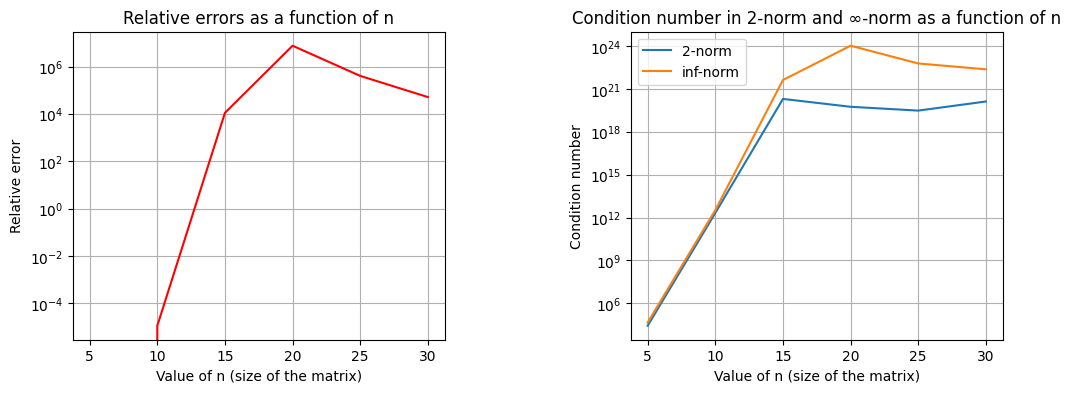

In [ ]:
errors = []
K_2s = []
K_infs = []

range_n = range(5,31,5)

for n in range_n:
  A = np.vander(np.arange(1,n+1), n, increasing=True)
  x_true = np.ones(n)
  b = A @ x_true
  x = np.linalg.solve(A,b)

  absolute_E = np.linalg.norm(x - x_true, 2)
  relative_E = absolute_E / np.linalg.norm(x_true, 2)

  K_2 = np.linalg.cond(A, 2)
  K_inf = np.linalg.cond(A, np.inf)

  errors.append(relative_E)
  K_2s.append(K_2)
  K_infs.append(K_inf)

plot_errors_and_K(range_n, errors, K_2s, K_infs, log=True)

For Vandermonde matrices, both $K_2 (A)$ and $K_∞ (A)$ tend to grow large and quickly. This is because the structure of the Vandermonde matrix, with its geometric progression in each row, inherently leads to sensitivity in calculations.

The numerical value of the condition number of an $n \times n$ matrix depends on the particular norm used, but because of the equivalence of norms in vector spaces, these values can differ by at most a fixed constant (which depends on $n$), and hence they are equally useful as quantitative measure of conditioning. In particular, two norms $||x||_p$ and $||x||_q$ are said to be equivalent in a vector space $V$ if there exists two positive constants $c_{pq}$ and $C_{pq}$ such that:
$$c_{pq}||x||_q≤||x||_p≤C_{pq}||x||_q, \forall x \in V$$.

There is a direct relationship between the condition number of a matrix and the relative error. The typically high condition number of Vandermonde matrices often leads to significant relative errors in solutions, especially for higher-dimensional systems.

3. The Hilbert matrix (`scipy.linalg.hilbert`) of dimension $n = \{4, 5, 6, . . . , 12\}$.

<center>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/13fc2a24c3685d26952bd040d03f4727ae295bb4">
</center>

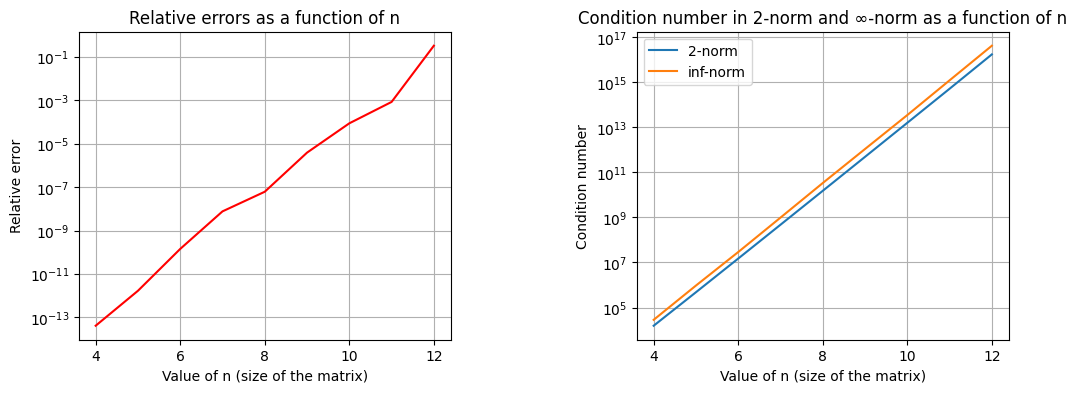

In [ ]:
errors = []
K_2s = []
K_infs = []

range_n = range(4,13)

for n in range_n:
  A = ln.hilbert(n)
  x_true = np.ones(n)
  b = A @ x_true
  x = np.linalg.solve(A,b)

  absolute_E = np.linalg.norm(x_true - x, 2)
  relative_E = absolute_E / np.linalg.norm(x_true, 2)

  K_2 = np.linalg.cond(A,2)
  K_inf = np.linalg.cond(A,np.inf)

  errors.append(relative_E)
  K_2s.append(K_2)
  K_infs.append(K_inf)

plot_errors_and_K(range_n, errors, K_2s, K_infs, log=True)

Hilbert matrices are known for being extremely ill-conditioned. Both $K_2(A)$ and $K_∞(A)$ for a Hilbert matrix tend to be very high and grow rapidly with the size of the matrix, exhibiting a similar trend due to the structure of the matrix.

The numerical value of the condition number of an $n \times n$ matrix depends on the particular norm used, but because of the equivalence of norms in vector spaces, these values can differ by at most a fixed constant (which depends on $n$), and hence they are equally useful as quantitative measure of conditioning. In particular, two norms $||x||_p$ and $||x||_q$ are said to be equivalent in a vector space $V$ if there exists two positive constants $c_{pq}$ and $C_{pq}$ such that:
$$c_{pq}||x||_q≤||x||_p≤C_{pq}||x||_q, \forall x \in V$$.

For Hilbert matrices, the high condition numbers are indicative of a significant sensitivity to input errors, leading to large relative errors in solutions. This is a classic example of how a high condition number can signal potential difficulties in solving a system of equations accurately.


# Floating Point Arithmetic.

1. The Machine epsilon ϵ is the distance between 1 and the next floating point number. Compute ϵ, which is defined as the smallest floating point number such that it holds:
$$fl(1 + ϵ) > 1$$


In [ ]:
eps = 1

while 1+eps > 1:
  prec = eps
  eps = eps/2

print("Computed epsilon: ", prec)
print("True epsilon: ", np.finfo(float).eps)

Computed epsilon:  2.220446049250313e-16
True epsilon:  2.220446049250313e-16


2.  Let’s consider the sequence $$a_n = (1 + 1/n)^n$$ It is well known that:
$$ \lim_{n\to\infty} a_n = e $$
where e is the Nepero costant. Choose different values for $n$, compute $a_n$ and compare it to the real value of the costant.

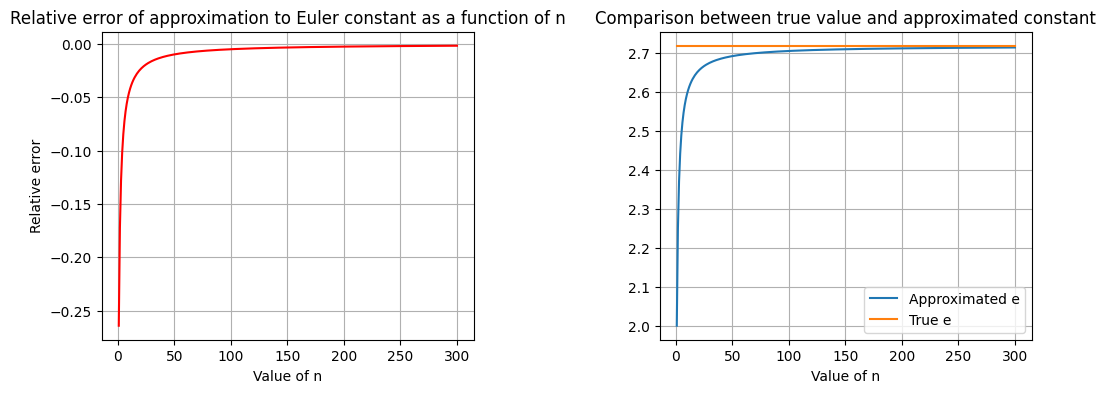

In [ ]:
N = 300
approx = []

range_n = range(1,N+1)

for n in range_n:
  approx.append((1+1/n)**n)

rel_err = [(approx[i]-math.e)/math.e for i in range(N)]

plot_errors_nepero(range_n, rel_err, N)

What happens if you choose a large value of n? Guess the reason.

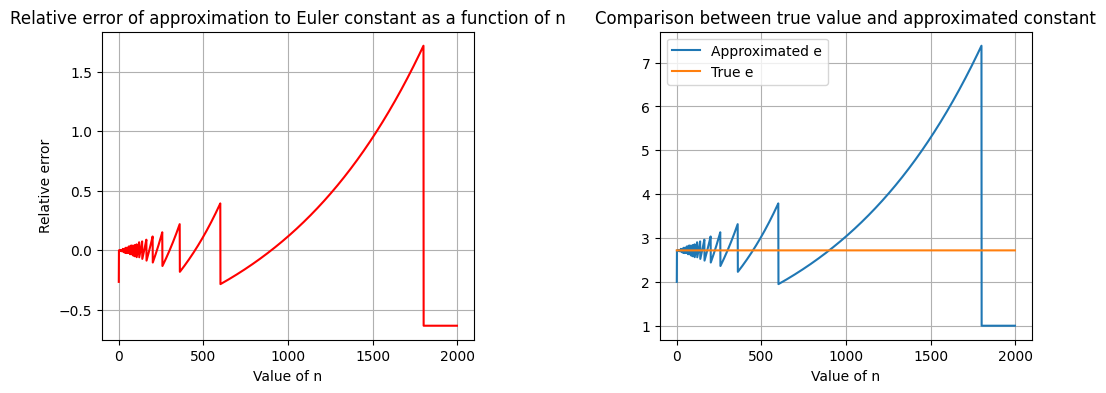

In [ ]:
N = 10000000000000000
gap = 5000000000000
steps = int(N/gap)

approx = []

for n in range(1,N+1, gap):
  approx.append((1+1/n)**n)

rel_err = [((approx[i]-math.e)/math.e) for i in range(steps)]

plot_errors_nepero(range(steps), rel_err, N, x_with_N = False)

In the two plots above $n$ is initially set to 1 and then it is increased by $5*10^{12}$ at each each step of the computation. Although the approximation seemed to become more and more precise with larger values of $n$, when assigning huge values to $n$ it can be observed that above a certain threshold the computed $e$ tends to become less accurate. This behaviour is probably due to the limitations of the floating-point representation, in fact, for larger values of $n$, the value of $\frac{1}{n}$ contained in $$(1 + \frac{1}{n})^n$$ becomes smaller and more difficult to represent in floating-point arithmetic. After a certain number of steps the Python interpreter has to round and truncate the approximations, leaving fewer and fewer significant digits to work with, resulting in the approximation converging to wrong values.

3.  Let’s consider the matrices:
$$
A=\begin{pmatrix}
4 & 2\\
1 & 3
\end{pmatrix}
\qquad
B=\begin{pmatrix}
4 & 2\\
2 & 1
\end{pmatrix}
$$

Compute the rank of A and B and their eigenvalues. Are A and B full-rank matrices? Can you infer
some relationship between the values of the eigenvalues and the full-rank condition? Please, corroborate
your deduction with other examples.

In [ ]:
A = np.matrix([[4, 2], [1, 3]])
B = np.matrix([[4, 2], [2, 1]])

rank_A = np.linalg.matrix_rank(A)
rank_B = np.linalg.matrix_rank(B)

eigenvalues_A = np.linalg.eigvals(A)
eigenvalues_B = np.linalg.eigvals(B)

if rank_A == 2:
  print(f"rank(A) = {rank_A} -> A is a full rank matrix")
else:
  print(f"rank(A) = {rank_A} -> A is not a full rank matrix (max possible rank -> 2)")
if rank_B == 2:
  print(f"rank(B) = {rank_B} -> B is a full rank matrix")
else:
  print(f"rank(B) = {rank_B} -> B is not a full rank matrix (max possible rank -> 2)")

print(f"\nEigenvalues of A -> {eigenvalues_A}")
print(f"Eigenvalues of B -> {eigenvalues_B}")

rank(A) = 2 -> A is a full rank matrix
rank(B) = 1 -> B is not a full rank matrix (max possible rank -> 2)

Eigenvalues of A -> [5. 2.]
Eigenvalues of B -> [5. 0.]


There is a relationship between the eigenvalues and the full rank condition of a matrix. The eigenvalues of matrix can be non-zero only if the matrix is full-rank.

In fact,we know that given a matrix $A$,
$$ rank_{max}(A) \Leftrightarrow det(A)\neq 0$$

and
$$det(A) = \prod_{i \in \sigma_M}{\lambda_i}$$
so
$$rank(A) = rank_{max}(A)\Rightarrow det(A) \neq 0 \Rightarrow \lambda_i \neq 0 \quad \forall i $$
and
$$rank(B) \neq rank_{max}(B)\Rightarrow det(B) = 0 \Rightarrow \exists i \quad \lambda_i = 0  \quad $$

For example, any matrix of zeros cannot be a full-rank matrix. Here's an example:

In [ ]:
n = 4
M = np.zeros((n,n))

print("M: \n", M)
print("\nEigenvalues of M: ", np.linalg.eigvals(M))
print("\nRank of M: ",np.linalg.matrix_rank(M))
print(f"Determinant of M: {np.linalg. det(M)}")

M: 
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Eigenvalues of M:  [0. 0. 0. 0.]

Rank of M:  0
Determinant of M: 0.0


Moreover, if M is the identity matrix, it is full rank with $det(M)=1$, in fact its eigenvalues (diagonal elements) are all 1s.

In [ ]:
n = 4
M = np.identity(n)

print("M: \n", M)
print("\nEigenvalues of M: ", np.linalg.eigvals(M))
print("\nRank of M: ",np.linalg.matrix_rank(M))
print(f"Determinant of M: {np.linalg. det(M)}")

M: 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

Eigenvalues of M:  [1. 1. 1. 1.]

Rank of M:  4
Determinant of M: 1.0


Although, by setting to zero one of the elements of the diagonal, $det(M) = 0$ and the matrix is not full-rank anymore (ideed, we have a null eigenvalue):

In [ ]:
n = 4
M = np.identity(n)
M[1,1] = 0

print("M: \n", M)
print("\nEigenvalues of M: ", np.linalg.eigvals(M))
print("\nRank of M: ",np.linalg.matrix_rank(M))
print(f"Determinant of M: {np.linalg. det(M)}")

M: 
 [[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

Eigenvalues of M:  [1. 0. 1. 1.]

Rank of M:  3
Determinant of M: 0.0
